In [1]:
import cv2
import matplotlib
import numpy as np
import pandas as pd
import skimage.measure
import matplotlib.pyplot as plt
from glob import glob
from skimage.feature import greycomatrix, greycoprops
%matplotlib inline 

## Image Path

In [2]:
img_path = "Dataset\\Apple\\0_100.jpg"

## Display Image

In [3]:
def display(img):
    plt.imshow (img, interpolation = 'nearest')
    _ = plt.axis(False)

## Remove Background

In [4]:
def remove_background(img, threshold):
    """
    This method removes background from your image
    
    :param img: cv2 image
    :type img: np.array
    :param threshold: threshold value for cv2.threshold
    :type threshold: float
    :return: RGBA image
    :rtype: np.ndarray
    """
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
    
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv2.boundingRect(cnt)
    dst = masked_data[y: y + h, x: x + w]

    dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(dst)

    rgba = [r, g, b, alpha]
    dst = cv2.merge(rgba, 4)
    
    dst = cv2.cvtColor(dst, cv2.COLOR_BGRA2RGB)

    return dst

## Increase Contrast

In [5]:
def add_contrast(img, alpha, beta):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

## Normal Image

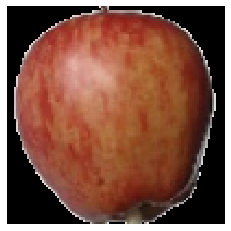

In [6]:
img = cv2.imread(img_path)
img = remove_background(img, 225)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

## Color Enhancement

In [25]:
img_path = "Dataset\\Lychee\\0_100.jpg"
img_path = "Test_Images\\Apple\\apple4.jpg"

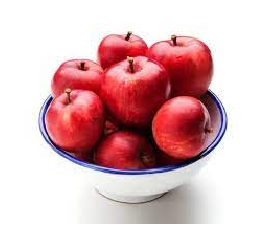

In [26]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

(88, 75, 3)

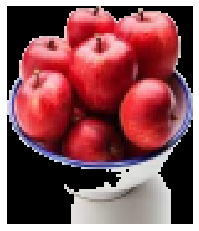

In [27]:
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100),interpolation = cv2.INTER_AREA)
img = remove_background(img, 225)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0
display(img)
img.shape

In [28]:
r, g, b = cv2.split(img)
img_sum = r + g + b
CR, CG, CB = cv2.divide(r, img_sum), cv2.divide(g, img_sum), cv2.divide(b, img_sum)

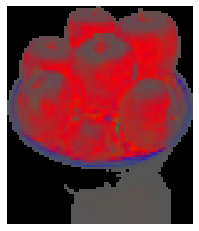

In [29]:
img_tmp = cv2.merge((CR, CG, CB))
display(img_tmp)

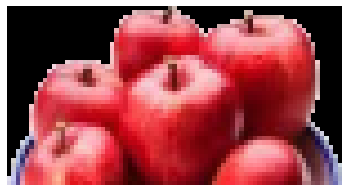

In [36]:
img_tmp = np.uint8(img_tmp * 255)

img_gray = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to Image
img_blur = cv2.GaussianBlur(img_gray, (7,7), 1)

# Canny Edge Detection
img_canny = cv2.Canny(img_blur, 50, 150)

# Edge Detector
kernel = np.ones((5, 5), dtype = np.uint8)
img_dilate = cv2.dilate(img_canny, kernel, iterations = 1)

contours, hier = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

roi = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y: y + h, x: x + w]
    
display(roi)

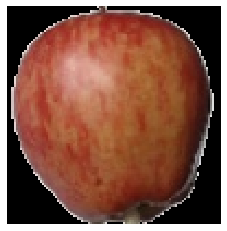

In [13]:
img_path = "Dataset\\Apple\\0_100.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100),interpolation = cv2.INTER_AREA)
img = remove_background(img, 225)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
img_sum = r + g + b
CR, CG, CB = cv2.divide(r, img_sum), cv2.divide(g, img_sum), cv2.divide(b, img_sum)
img_tmp = cv2.merge((CR, CG, CB))
img_tmp = np.uint8(img_tmp * 255)
img_gray = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (7,7), 1)
img_canny = cv2.Canny(img_blur, 50, 150)
kernel = np.ones((5, 5), dtype = np.uint8)
img_dilate = cv2.dilate(img_canny, kernel, iterations = 1)
contours, hier = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
roi = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y: y + h, x: x + w]
display(roi)

In [14]:
img = np.nan_to_num(img)
img.shape

(100, 100, 3)

## Pipeline 1D

In [15]:
def pipeline_1d(cv_img, convert_func):
    img_arr = np.array(cv_img)
    img_flatten = img_arr.reshape(1, -1).T
    img_squeeze = np.squeeze(img_flatten)
    img_convert = np.vectorize(convert_func)(img_squeeze)
    return img_convert

In [16]:
np.linspace(0, 255, 8)

array([  0.        ,  36.42857143,  72.85714286, 109.28571429,
       145.71428571, 182.14285714, 218.57142857, 255.        ])

## Convert to Val

In [17]:
# def convert_val_to_bin(x):
#     if x >= 0 and x < 0.25:
#         return 32
#     elif x >= 0.25 and x < 0.5:
#         return 96
#     elif x >= 0.5 and x < 0.75:
#         return 160
#     elif x >= 0.75 and x < 0.667:
#         return 224

In [18]:
# def convert_val_to_bin(x):
#     if x >= 0 and x < 0.167:
#         return 0
#     elif x >= 1.67 and x < 0.33:
#         return 51
#     elif x >= 0.33 and x < 0.5:
#         return 102
#     elif x >= 0.5 and x < 0.667:
#         return 153
#     elif x >= 0.667 and x < 0.83:
#         return 204
#     else:
#         return 255

In [19]:
# def convert_val_to_bin(x):
#     if x >= 0 and x < 0.125:
#         return 0
#     elif x >= 0.125 and x < 0.25:
#         return 32
#     elif x >= 0.25 and x < 0.375:
#         return 64
#     elif x >= 0.375 and x < 0.5:
#         return 96
#     elif x >= 0.5 and x < 0.625:
#         return 128
#     elif x >= 0.625 and x < 0.75:
#         return 160
#     elif x >= 0.75 and x < 0.875:
#         return 192
#     else:
#         return 255

In [20]:
def convert_val_to_bin(x):
    if x >= 0 and x < 64:
        return 32
    elif x >= 64 and x < 128:
        return 96
    elif x >= 128 and x < 192:
        return 160
    else:
        return 224

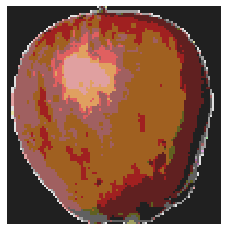

In [21]:
h = w = 100
# img = cv2.imread(img_path)
# img = cv2.resize(img, (100, 100),interpolation = cv2.INTER_AREA)
# img = remove_background(img, 225)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = pipeline_1d(roi, convert_val_to_bin)
new_img = new_img.reshape(100, 98, 3)
display(new_img)

In [22]:
np.log10(0.0001)

-4.0

In [23]:
np.log10(10)

1.0

In [24]:
np.random.uniform(-4, 1, 10)

array([-3.69393317,  0.78991164, -1.35368668, -2.74084285, -0.85475118,
        0.46386478, -1.53831627, -2.42372451, -3.06902762,  0.64036806])